## This notebook implemments the Q-learning algorithm with state Discretization for solving the MountainCar problem in gym for details about the environemnt go to https://gym.openai.com/envs/MountainCar-v0/



In [ ]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [75]:
env = gym.make('MountainCar-v0')

## Discretizationscheme referenced to https://github.com/llSourcell/Q_Learning_Explained/blob/master/q_learning.py

In [76]:
n_states = 40
def observation(state):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    dx = (env_high - env_low)/n_states
    a = int((state[0] - env_low[0])/dx[0])
    b = int((state[1] - env_low[1])/dx[1])
    return a,b

In [77]:
def evalute(render=False):
    state = env.reset()
    total_reward = 0
    for t in range(1000):
        if render:
            env.render()
        a,b = observation(state)
        action = np.argmax(Q[a][b])
        next_state,rewrad,done,_ = env.step(action)
        total_reward += rewrad
        if done:
            if render:
                env.render()
            env.close()
            return total_reward
        state = next_state 

The code is implementation follows the pseudo code in Reinforcement Learning An Introduction second edition by Richard S. Sutton and Andrew G. Barto, chapter 6 section 6.5, the pseudo code is writtent as comments


In [108]:
#Algorithm parameters
lr = 0.3
eps = 1
eps_decay_rate = 0.99
min_eps = 0.001
#Initialize Q(s, a), for all s 2 S+, a 2 A(s), arbitrarily except that Q(terminal , ·) = 0
episodes = 8000
gamma = 0.95
env = gym.make('MountainCar-v0')
Q = np.zeros((n_states,n_states,3))
rewards = []
total_rewads = 0
# Loop for each episode:
for episode in range(episodes):
    # Initialize S
    state = env.reset()
    for t in range(1000):
        # Choose Action A from state S using policy Derived from Q (e.g, eps-greedy policy)
        a,b = observation(state)
        if random.uniform(0,1) <= eps:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[a][b])
        # Take action A, and observe the rewrad and next state.
        next_state,rewrad,done,_ = env.step(action)
        a_,b_ = observation(next_state)
        # update the Q for the state action pair
        Q[a][b][action] = Q[a][b][action] + lr*(rewrad + gamma*np.max(Q[a_][b_]) 
                                                                - Q[a][b][action] )
        #S <- S0
        state = next_state
        #until S is terminal
        if done:
            rewards.append(evalute())
            break
    eps *= eps_decay_rate
    if eps < min_eps:
        eps = min_eps
print('Mean reward in the last 100 episode',np.mean(rewards[-100:]))

Mean reward in the last 100 episode -143.67


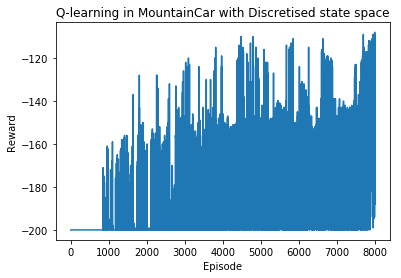

In [109]:
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning in MountainCar with Discretised state space')
plt.plot(range(len(rewards)),rewards)

In [144]:
evalute(True)

-140.0